In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv("bank-full.csv", delimiter=";")

In [195]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 1. Data Preparation

In [196]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [197]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]

In [198]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [199]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### 2. Question 1

In [202]:
# What is the most frequent observation (mode) for the column education?
df.education.mode()[0]

'secondary'

### 3. Question 2

In [203]:
# Creating categorical and numerical variables
categorical = df.select_dtypes(include="object").drop('y', axis = 1).columns.to_list()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [204]:
numerical = df.select_dtypes(include='number').columns.to_list()
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [205]:
def cor_heatmap(cor):
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.2')
    plt.show()

In [206]:
# Correlation with Pearson method
cor_pearson = df[numerical].corr(method ='pearson')
cor_pearson

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [207]:
# Correlation with Spearman method
cor_spearman = df[numerical].corr(method ='spearman')
cor_spearman

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096380,-0.008948,-0.033257,0.037136,-0.017468,-0.011900
balance,0.096380,1.000000,0.001329,0.042651,-0.030959,0.069676,0.079536
day,-0.008948,0.001329,1.000000,-0.058142,0.139581,-0.092226,-0.087780
duration,-0.033257,0.042651,-0.058142,1.000000,-0.107962,0.028698,0.031175
campaign,0.037136,-0.030959,0.139581,-0.107962,1.000000,-0.112284,-0.108448
pdays,-0.017468,0.069676,-0.092226,0.028698,-0.112284,1.000000,0.985645
previous,-0.011900,0.079536,-0.087780,0.031175,-0.108448,0.985645,1.000000


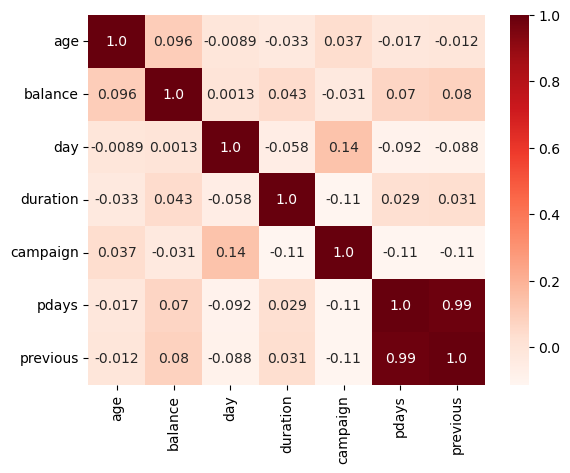

In [210]:
# Spearman correlation heatmap
cor_heatmap(cor_spearman)

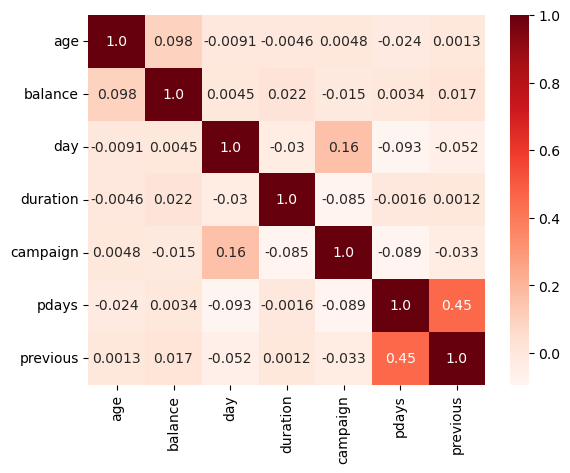

In [211]:
# Pearson correlation heatmap
cor_heatmap(cor_pearson)

In [212]:
df["age"].corr(df["balance"])

0.09778273937134742

In [213]:
df["day"].corr(df["campaign"])

0.1624902163261929

In [214]:
df["day"].corr(df["pdays"])

-0.09304407377294044

In [215]:
df["pdays"].corr(df["previous"])

0.4548196354805016

### 4. Target encoding

In [216]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [217]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### 5. Spliting the data

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [220]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [221]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [222]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

### 6. Question 3

In [223]:
from sklearn.metrics import mutual_info_score

In [224]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.y)

In [225]:
mi = df_full_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False)

poutcome     0.028893
month        0.024718
contact      0.013041
housing      0.009551
job          0.008437
education    0.002564
marital      0.001980
dtype: float64

In [226]:
mi.idxmax()

'poutcome'

### 7. Question 4

In [227]:
from sklearn.feature_extraction import DictVectorizer

In [241]:
# Use Scikit-Learn to encode categorical features
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [244]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [245]:
model.intercept_[0]

-0.9736141977902114

In [246]:
model.coef_[0].round(3)

array([-0.003,  0.   , -0.089,  0.221,  0.144, -1.338,  0.008,  0.004,
       -0.416, -0.249, -0.087, -0.221, -0.169, -0.805,  0.006, -0.305,
       -0.271, -0.363, -0.1  ,  0.373, -0.169, -0.163,  0.533, -0.226,
       -0.155, -0.136, -0.334, -0.449, -0.19 , -0.144, -0.706,  0.274,
       -0.395, -1.284, -0.945,  0.426,  1.622, -0.537, -1.014,  1.003,
        0.726, -0.   , -0.768, -0.746,  1.44 , -0.899,  0.016])

In [247]:
y_pred = model.predict_proba(X_val)[:, 1]

In [248]:
y_decision = (y_pred >= 0.5)

In [249]:
acc = round((y_val == y_decision).mean(), 2)

In [250]:
acc

0.9

### 8. Question 6

In [251]:
# Accuracy of training a model with all these features (using the same parameters as in Q4)
acc = (y_val == y_decision).mean()
acc

0.898252598982526

In [252]:
# Excluding each feature from this set and training a model without it.

# Initializing a dictionary to store feature and corresponding difference
diff_dict = {}

for feature in ['age', 'balance', 'marital', 'previous']:
    # Combine the lists and remove the current feature
    small = categorical + numerical  # Concatenating both lists
    small.remove(feature)  # Removing the current feature from the combined list
    
    train_dict = df_train[small].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[small].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.5)
    acc_new = (y_val == y_decision).mean()
    diff = acc-acc_new
    print(f"Feature: {feature}, Accuracy: {acc_new}, Difference: {diff}")

    # Store the difference in the dictionary
    diff_dict[feature] = diff
    
# Find the feature with the smallest difference
feature_with_min_diff = min(diff_dict, key=diff_dict.get)
print(f"Feature with the smallest difference: {feature_with_min_diff}, Difference: {diff_dict[feature_with_min_diff]}")
    

Feature: age, Accuracy: 0.8981420039814201, Difference: 0.00011059500110588427
Feature: balance, Accuracy: 0.8984737889847378, Difference: -0.00022119000221187957
Feature: marital, Accuracy: 0.898363193983632, Difference: -0.0001105950011059953
Feature: previous, Accuracy: 0.8979208139792081, Difference: 0.00033178500331787486
Feature with the smallest difference: balance, Difference: -0.00022119000221187957


### 9. Question 6

In [254]:
# Traing a regularized logistic regression with C: [0.01, 0.1, 1, 10]

acc_list = []
c_values = []  # List to store C values

for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_decision = (y_pred >= 0.5)
    acc = round((y_val == y_decision).mean(), 3)
    acc_list.append(acc)
    c_values.append(C)

    # Finding the index of the smallest accuracy
    min_index = acc_list.index(min(acc_list))

    # Getting the corresponding C values
    best_C = c_values[min_index]
    smallest_acc = acc_list[min_index]
    
print(f"Best C: {best_C}, Smallest Accuracy: {smallest_acc}")

Best C: 0.01, Smallest Accuracy: 0.894
